In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
import datetime as dt
import tabula as tb
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.multivariate.manova import MANOVA
from statsmodels.formula.api import ols
import scipy.stats as sp
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, PowerTransformer, MaxAbsScaler , OneHotEncoder
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier as knn , KNeighborsRegressor as knr
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import ElasticNet
from sklearn.utils.fixes import loguniform
from functions import *
from math import radians
import json
import timeit
from timeit import default_timer as timer
import datetime as dt
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
import plotly.graph_objects as go
import shap

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [2]:
raw_data = pd.read_csv("DATA/clean_data.csv", index_col = 0)
raw_data = raw_data.reset_index(drop=True)

In [3]:
gas_pred = pd.read_csv("DATA/Predictions/naturalgas_pred.csv")
elec_pred = pd.read_csv("DATA/Predictions/elec_pred.csv")
other_pred = pd.read_csv("DATA/Predictions/other_pred.csv")
steam_pred = pd.read_csv("DATA/Predictions/steam_pred.csv")
energy_pred = pd.read_csv("DATA/Predictions/energyuse_pred.csv")

In [4]:
other_pred.shape

(3167, 2)

In [5]:
raw_data = pd.concat([raw_data, gas_pred, elec_pred, other_pred, steam_pred, energy_pred], axis = 1)

In [6]:
raw_data.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'NumberofBuildings', 'PropertyGFABuilding', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEnergyUse_kBtu',
       'SteamUse_kBtu', 'Electricity_kBtu', 'NaturalGas_kBtu',
       'OtherFuelUse_kBtu', 'GHGEmissions_MetricTonsCO2e',
       'GHGEmissionsIntensity_kgCO2e_ft2', 'Unnamed: 0', 'NaturalGas_pred',
       'Unnamed: 0', 'Elec_pred', 'Unnamed: 0', 'Other_pred', 'Unnamed: 0',
       'Steam_pred', 'Unnamed: 0', 'EnergyUse_pred'],
      dtype='object')

In [7]:
raw_data = raw_data.drop('Unnamed: 0', axis =1)

In [8]:
df_analyse = raw_data.loc[:, ['GHGEmissions_MetricTonsCO2e', 'NaturalGas_pred', 'Elec_pred',
       'Other_pred', 'Steam_pred', 'EnergyUse_pred']]

In [9]:
df_analyse.columns

Index(['GHGEmissions_MetricTonsCO2e', 'NaturalGas_pred', 'Elec_pred',
       'Other_pred', 'Steam_pred', 'EnergyUse_pred'],
      dtype='object')

In [10]:
scaler = MaxAbsScaler()

data = df_analyse.loc[:,df_analyse.select_dtypes(include=[np.number]).columns]


for i in data.columns :
    data[i] = scaler.fit_transform(data[i].values.reshape(-1, 1))

data

,GHGEmissions_MetricTonsCO2e,NaturalGas_pred,Elec_pred,Other_pred,Steam_pred,EnergyUse_pred
0,0.014817,0.096667,0.031996,2.594464e-08,0.040963,0.025354
1,0.017537,0.169418,0.031996,2.362013e-08,0.052455,0.022331
2,0.123839,0.096667,0.548580,1.180443e-07,0.131818,0.226577
3,0.016978,0.096667,0.017245,2.362013e-08,0.063991,0.011869
4,0.029934,0.408177,0.064550,2.594464e-08,0.134054,0.042445
...,...,...,...,...,...,...
3162,0.001205,0.010204,0.007469,2.216932e-08,0.030233,0.006129
3163,0.001907,0.010891,0.007469,2.216932e-08,0.028707,0.006129
3164,0.013250,0.004249,0.008022,2.216932e-08,0.030233,0.006134
3165,0.001311,0.008033,0.008022,2.216932e-08,0.048897,0.006129


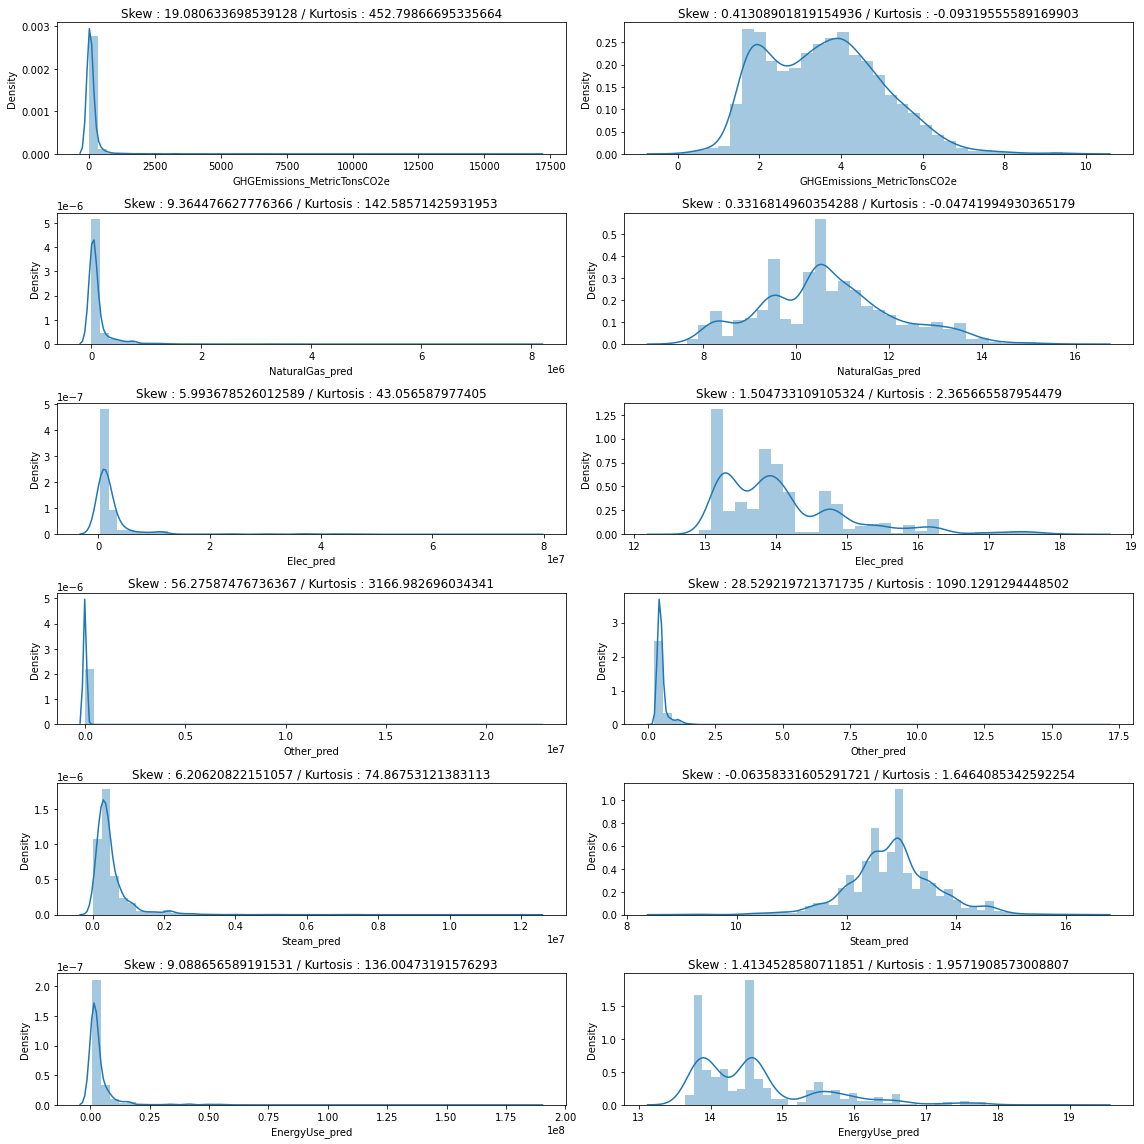

In [11]:
choices = data.columns



f, axs = plt.subplots(6,2, figsize = (16, 16))

i=0
choices[i]

for ix,iy in np.ndindex(axs.shape):
    if i == len(choices) :
        break
    else:
        if iy / 2 == 0 :
            k = df_analyse[choices[i]].kurtosis()
            sk = df_analyse[choices[i]].skew()
            ax1 = sns.distplot(df_analyse[choices[i]],ax=axs[ix,iy])
            ax1.set_title("Skew : " + str(sk) + " / Kurtosis : " + str(k))

        else :
            
            k = np.log(df_analyse[choices[i]]+1).kurtosis()
            sk = np.log(df_analyse[choices[i]]+1).skew()
            ax1 = sns.distplot(np.log(df_analyse[choices[i]]+1),ax=axs[ix,iy])
            ax1.set_title("Skew : " + str(sk) + " / Kurtosis : " + str(k))
            
            i+=1
            



plt.tight_layout()

In [12]:
y = np.log(df_analyse['GHGEmissions_MetricTonsCO2e']+1)
features = df_analyse.drop(['GHGEmissions_MetricTonsCO2e'],axis = 1)
features = np.log(features+1)
features_name = features.columns

In [13]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.33, random_state = 42)

In [14]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_x.fit_transform(X_train)
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
X_test = scaler_x.transform(X_test)
y_test = scaler_y.transform(y_test.values.reshape(-1, 1))

In [15]:
X_test_t = pd.DataFrame(X_test, columns = features_name)
X_train_t = pd.DataFrame(X_train, columns = features_name)

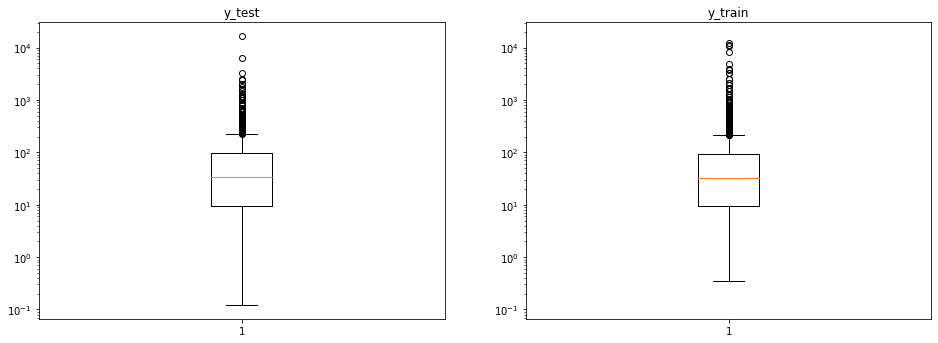

In [16]:
a = [(np.exp(scaler_y.inverse_transform(y_test))-1).reshape(1,-1).tolist(), (np.exp(scaler_y.inverse_transform(y_train))-1).reshape(1,-1).tolist()]

fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2, sharey=ax1)

ax1.boxplot(a[0], meanline = True)
ax1.set_title('y_test')
ax2.boxplot(a[1], meanline = True)
ax2.set_title('y_train')
ax1.set(yscale="log")
ax2.set(yscale="log")
plt.show()

In [17]:
print('Mean y_test : ', round(scaler_y.inverse_transform(y_test).mean(),3))
print('Mean y_train : ', round(scaler_y.inverse_transform(y_train).mean(), 3))

Mean y_test :  3.589
Mean y_train :  3.563


In [18]:
X_train.shape

(2121, 5)

### ELASTICNET

In [19]:
random_grid = {'alpha': np.logspace(-5, 1, 60),
               'l1_ratio':[.1, .5, .7, .9, .95, .99, 1],
               'selection':['cyclic', 'random']}

In [20]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
eln = ElasticNet(fit_intercept=False)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
eln_random = RandomizedSearchCV(estimator = eln, param_distributions = random_grid, n_iter = 200, cv = 5, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
start = timer()
eln_random.fit(X_train, y_train)
end = timer()

print ("The time of execution of above program is : ", dt.timedelta(seconds=end-start))

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
The time of execution of above program is :  0:00:01.236990


In [21]:
ElasticNet().get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'l1_ratio', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [22]:
eln_random.best_params_

{'selection': 'cyclic', 'l1_ratio': 0.7, 'alpha': 0.005568813990945273}

In [23]:
eln_random.best_score_

0.47014583718191394

In [24]:
best_random = eln_random.best_estimator_
random_accuracy_test = eln_random.score(X_test, y_test)
random_accuracy_train = eln_random.score(X_train, y_train)

In [25]:
print("Score train : " + str(random_accuracy_train))
print("Score test : " + str(random_accuracy_test))

Score train : 0.4735551060996587
Score test : 0.4729480424642486


In [26]:
# Make predictions and determine the error
predictions = np.exp(scaler_y.inverse_transform(eln_random.predict(X_train))-1)
errors = abs(np.exp(scaler_y.inverse_transform(y_train)-1) - predictions)
# Display the performance metrics
print("-- Train score --")
print('Mean Absolute Deviation:', round(np.mean(errors), 2))
mape = np.mean(abs((np.exp(scaler_y.inverse_transform(y_train)-1) - predictions) / np.exp(scaler_y.inverse_transform(y_train)-1)))
print('MAPE:', round(mape, 2), '%.')
mse = mean_squared_error(np.exp(scaler_y.inverse_transform(y_train)-1), predictions, squared = True)
print('MSE : ', round(mse, 2))
rmse = mean_squared_error(np.exp(scaler_y.inverse_transform(y_train)-1), predictions, squared = False)
print('RMSE : ', round(rmse, 2))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

# Make predictions and determine the error
predictions = np.exp(scaler_y.inverse_transform(eln_random.predict(X_test))-1)
errors = abs(np.exp(scaler_y.inverse_transform(y_test)-1) - predictions)
# Display the performance metrics
print("-- Test score --")
print('Mean Absolute Deviation:', round(np.mean(errors), 2))
mape = np.mean(abs((np.exp(scaler_y.inverse_transform(y_test)-1)- predictions) / np.exp(scaler_y.inverse_transform(y_test)-1)))
print('MAPE:', round(mape, 2), '%.')
mse = mean_squared_error(np.exp(scaler_y.inverse_transform(y_test)-1), predictions, squared = True)
print('MSE : ', round(mse, 2))
rmse = mean_squared_error(np.exp(scaler_y.inverse_transform(y_test)-1), predictions, squared = False)
print('RMSE : ', round(rmse, 2))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

-- Train score --
Mean Absolute Deviation: 50.64
MAPE: 4.15 %.
MSE :  20508.15
RMSE :  143.21
Accuracy: 95.85 %.
-- Test score --
Mean Absolute Deviation: 55.57
MAPE: 4.62 %.
MSE :  43371.31
RMSE :  208.26
Accuracy: 95.38 %.


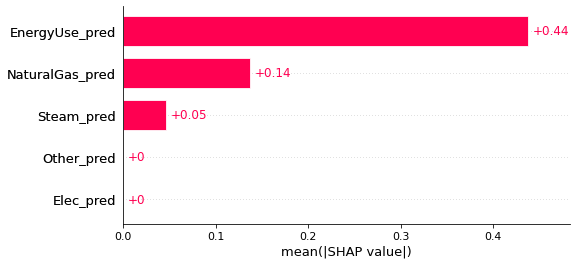

In [27]:
explainer = shap.Explainer(eln_random.best_estimator_, X_train_t)
shap_values = explainer(X_train_t)

shap.plots.bar(shap_values)

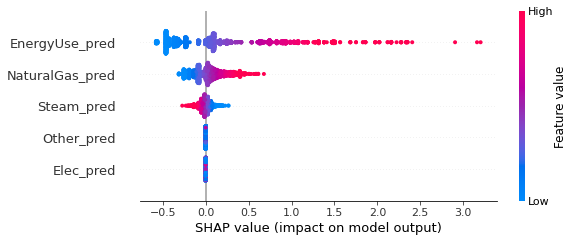

In [28]:
shap.summary_plot(shap_values, feature_names=features_name)

In [29]:
eln_df = pd.DataFrame(data = predictions)
eln_df['True_values'] = y_test
eln_df.columns = ['predictions', 'True_values']
eln_df['Residus'] = eln_df['predictions'] - eln_df['True_values']

In [30]:
eln_df = eln_df.sort_values('predictions')
eln_df = eln_df.reset_index(drop=True)

No handles with labels found to put in legend.


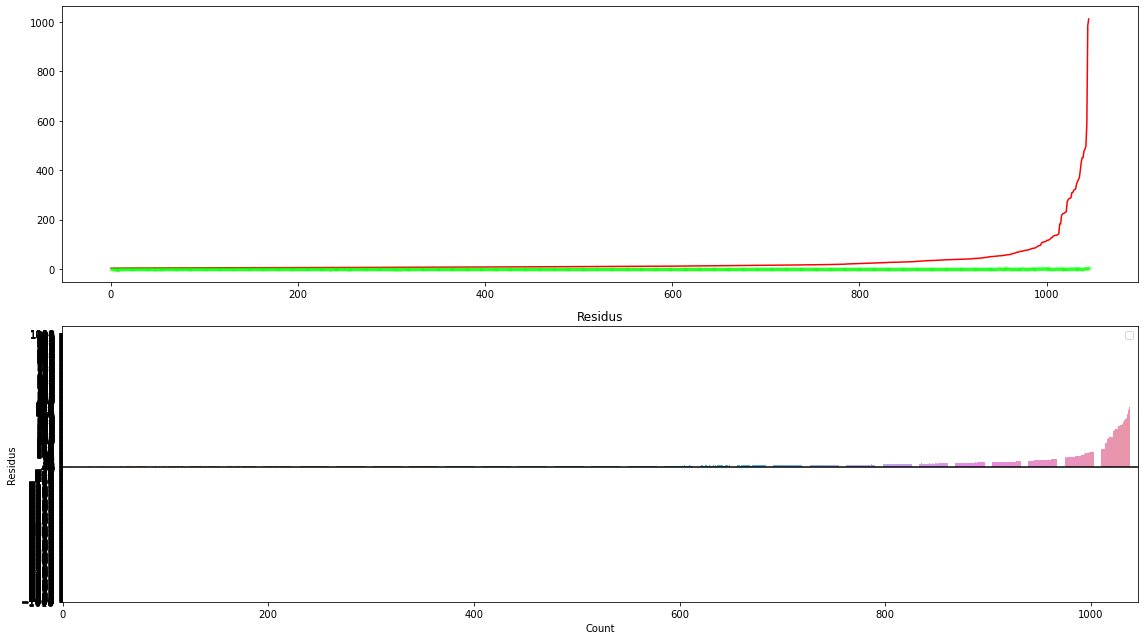

In [31]:
figs, axs = plt.subplots(2,1,figsize=(16,9))
axs[0].plot(eln_df.index.to_list(), eln_df['predictions'].values, c='red', label='Prediction')
axs[0].plot(eln_df.index.to_list(), eln_df['True_values'].values, linestyle = 'none', marker= '.', c='lime',alpha=0.3, label='True_value')


sns.barplot(x=eln_df.index.to_list(), y=eln_df['Residus'], ax=axs[1])
axs[1].axhline(0, color="k", clip_on=False)
axs[1].set(xlabel='Count', ylabel='Residus')
axs[1].set_title("Residus")
axs[1].set_xticks(np.arange(min(eln_df.index.to_list()), max(eln_df.index.to_list())+1, 200))
axs[1].set_yticks(np.arange(round(-max(eln_df['Residus']),0)-1, round(max(eln_df['Residus']),0)+1, 2))

plt.legend()
plt.tight_layout()

## XGBOOST REGRESSOR

In [34]:
xgb1 = XGBRegressor(booster = 'gbtree')
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [0.01,.02,.03, 0.05, .07], #so called `eta` value
              'max_depth': [2,3,4,5],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [400]}

xgb_grid = RandomizedSearchCV(xgb1,
                        parameters,
                        cv = 5,
                        verbose=2,
                        n_iter = 200,
                        n_jobs = -1)

In [35]:
start = timer()
xgb_grid.fit(X_train, y_train)
end = timer()

print ("The time of execution of above program is : ", dt.timedelta(seconds=end-start))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
The time of execution of above program is :  0:00:23.720310


In [36]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.5253373057146655
{'subsample': 0.7, 'objective': 'reg:squarederror', 'nthread': 4, 'n_estimators': 400, 'min_child_weight': 4, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.7}


In [37]:
best_random = xgb_grid.best_estimator_
random_accuracy_test = xgb_grid.score(X_test, y_test)
random_accuracy_train = xgb_grid.score(X_train, y_train)

In [38]:
print("Score train : " + str(random_accuracy_train))
print("Score test : " + str(random_accuracy_test))

Score train : 0.6339913008440206
Score test : 0.5232374596291656


In [39]:
# Make predictions and determine the error

predictions = (np.exp(scaler_y.inverse_transform(xgb_grid.predict(X_train)))-1)
errors = abs((np.exp(scaler_y.inverse_transform(y_train))-1) - predictions)
# Display the performance metrics
print("-- Train score --")
print('Mean Absolute Deviation:', round(np.mean(errors), 2))
mape = np.mean(abs(((np.exp(scaler_y.inverse_transform(y_train))-1) - predictions) / (np.exp(scaler_y.inverse_transform(y_train))-1)))
print('MAPE:', round(mape, 2), '%.')
mse = mean_squared_error((np.exp(scaler_y.inverse_transform(y_train))-1), predictions, squared = True)
print('MSE : ', round(mse, 2))
rmse = mean_squared_error((np.exp(scaler_y.inverse_transform(y_train))-1), predictions, squared = False)
print('RMSE : ', round(rmse, 2))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

# Make predictions and determine the error
predictions = (np.exp(scaler_y.inverse_transform(xgb_grid.predict(X_test)))-1)
errors = abs((np.exp(scaler_y.inverse_transform(y_test))-1) - predictions)
# Display the performance metrics
print("-- Test score --")
print('Mean Absolute Deviation:', round(np.mean(errors), 2))
mape = np.mean(abs(((np.exp(scaler_y.inverse_transform(y_test))-1) - predictions) / (np.exp(scaler_y.inverse_transform(y_test))-1)))
print('MAPE:', round(mape, 2), '%.')
mse = mean_squared_error((np.exp(scaler_y.inverse_transform(y_test))-1), predictions, squared = True)
print('MSE : ', round(mse, 2))
rmse = mean_squared_error((np.exp(scaler_y.inverse_transform(y_test))-1), predictions, squared = False)
print('RMSE : ', round(rmse, 2))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

-- Train score --
Mean Absolute Deviation: 139.87
MAPE: 5.41 %.
MSE :  95722.3
RMSE :  309.39
Accuracy: 94.59 %.
-- Test score --
Mean Absolute Deviation: 145.58
MAPE: 5.74 %.
MSE :  302494.5
RMSE :  550.0
Accuracy: 94.26 %.


 96%|=================== | 2044/2121 [00:16<00:00]       

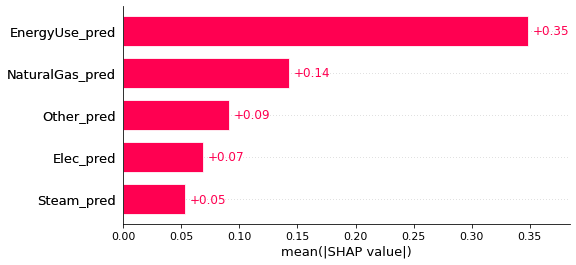

In [40]:
explainer = shap.TreeExplainer(xgb_grid.best_estimator_, X_train_t)
shap_values = explainer(X_train_t)

shap.plots.bar(shap_values)

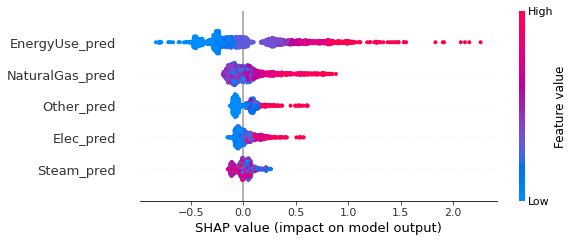

In [41]:
shap.summary_plot(shap_values, feature_names=features_name)

In [42]:
# Get numerical feature importances
importances = list(best_random.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(features_name, round(importance, 2)) for features_name, importance in zip(features_name, importances)]
# Sort the feature importances by most important firstperf_model['XGBoost Regressor'] = mape
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: EnergyUse_pred       Importance: 0.4699999988079071
Variable: Elec_pred            Importance: 0.1899999976158142
Variable: Other_pred           Importance: 0.17000000178813934
Variable: NaturalGas_pred      Importance: 0.10999999940395355
Variable: Steam_pred           Importance: 0.07000000029802322


In [43]:
xgb_df = pd.DataFrame(data = (scaler_y.inverse_transform(xgb_grid.predict(X_test))))
xgb_df['True_values'] = (scaler_y.inverse_transform(y_test))
xgb_df.columns = ['predictions', 'True_values']
xgb_df['Residus'] = xgb_df['predictions'] - xgb_df['True_values']

In [44]:
xgb_df = xgb_df.sort_values('predictions')
xgb_df = xgb_df.reset_index(drop=True)

No handles with labels found to put in legend.


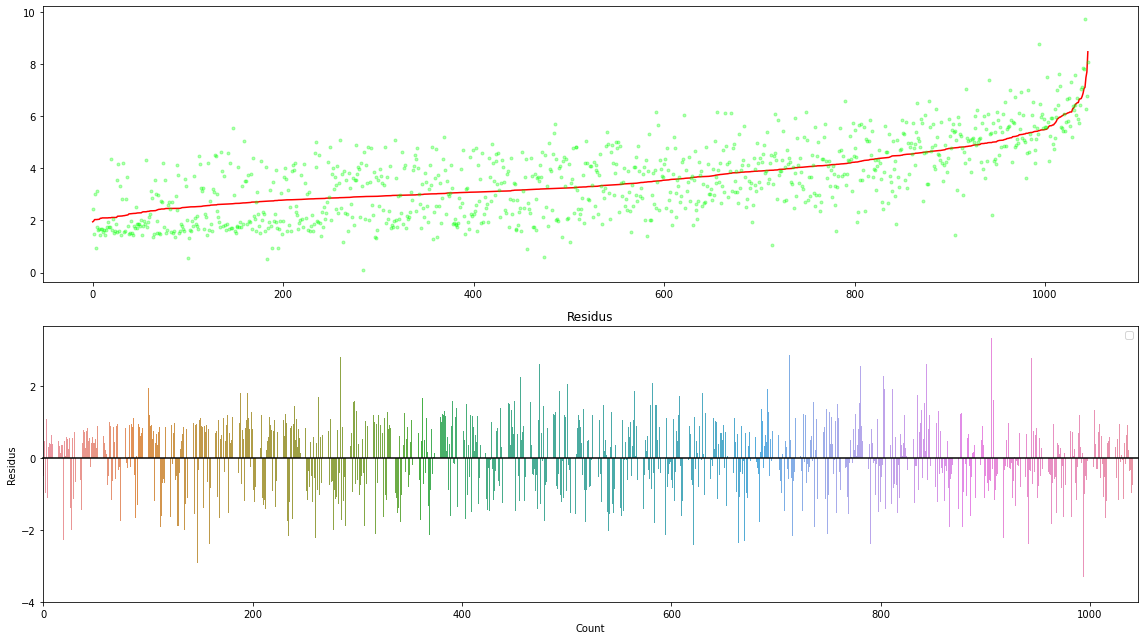

In [45]:
figs, axs = plt.subplots(2,1,figsize=(16,9))
axs[0].plot(xgb_df.index.to_list(), xgb_df['predictions'].values, c='red', label='Prediction')
axs[0].plot(xgb_df.index.to_list(), xgb_df['True_values'].values, linestyle = 'none', marker= '.', c='lime',alpha=0.3, label='True_value')


sns.barplot(x=xgb_df.index.to_list(), y=xgb_df['Residus'], ax=axs[1])
axs[1].axhline(0, color="k", clip_on=False)
axs[1].set(xlabel='Count', ylabel='Residus')
axs[1].set_title("Residus")
axs[1].set_xticks(np.arange(min(xgb_df.index.to_list()), max(xgb_df.index.to_list())+1, 200))
axs[1].set_yticks(np.arange(round(-max(xgb_df['Residus']),0)-1, round(max(xgb_df['Residus']),0)+1, 2))

plt.legend()
plt.tight_layout()

## AJOUT STARSCORE

In [55]:
df_analyse = raw_data.loc[:, ['GHGEmissions_MetricTonsCO2e', 'NaturalGas_pred', 'Elec_pred',
       'Other_pred', 'Steam_pred', 'EnergyUse_pred', 'ENERGYSTARScore']]

In [56]:
df_analyse = df_analyse.dropna(subset=['ENERGYSTARScore'])

In [57]:
y = np.log(df_analyse['GHGEmissions_MetricTonsCO2e']+1)
features = df_analyse.drop(['GHGEmissions_MetricTonsCO2e'],axis = 1)
features = np.log(features+1)
features_name = features.columns

In [58]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.33, random_state = 42)

In [59]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_x.fit_transform(X_train)
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
X_test = scaler_x.transform(X_test)
y_test = scaler_y.transform(y_test.values.reshape(-1, 1))

In [60]:
X_test_t = pd.DataFrame(X_test, columns = features_name)
X_train_t = pd.DataFrame(X_train, columns = features_name)

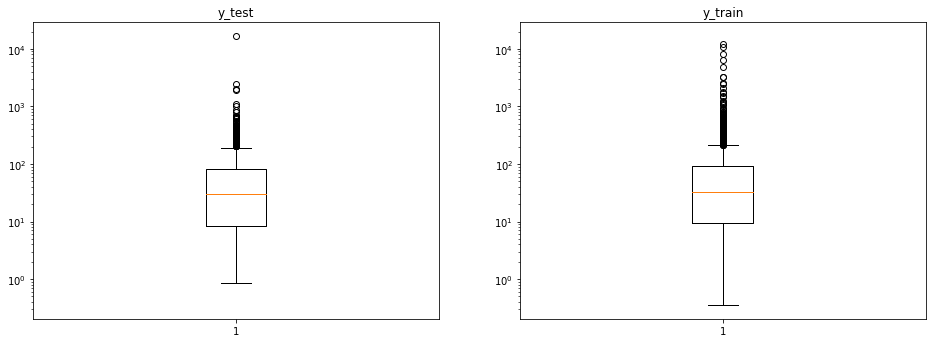

In [61]:
a = [(np.exp(scaler_y.inverse_transform(y_test))-1).reshape(1,-1).tolist(), (np.exp(scaler_y.inverse_transform(y_train))-1).reshape(1,-1).tolist()]

fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2, sharey=ax1)

ax1.boxplot(a[0], meanline = True)
ax1.set_title('y_test')
ax2.boxplot(a[1], meanline = True)
ax2.set_title('y_train')
ax1.set(yscale="log")
ax2.set(yscale="log")
plt.show()

In [62]:
print('Mean y_test : ', round(scaler_y.inverse_transform(y_test).mean(),3))
print('Mean y_train : ', round(scaler_y.inverse_transform(y_train).mean(), 3))

Mean y_test :  3.497
Mean y_train :  3.553


In [63]:
X_train.shape

(1589, 6)

In [64]:
X_test_t = pd.DataFrame(X_test, columns = features_name)
X_train_t = pd.DataFrame(X_train, columns = features_name)

## ELASTICNET

In [65]:
random_grid = {'alpha': np.logspace(-5, 1, 60),
               'l1_ratio':[.1, .5, .7, .9, .95, .99, 1],
               'selection':['cyclic', 'random']}

In [66]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
eln = ElasticNet(fit_intercept=False)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
eln_random = RandomizedSearchCV(estimator = eln, param_distributions = random_grid, n_iter = 200, cv = 5, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
start = timer()
eln_random.fit(X_train, y_train)
end = timer()

print ("The time of execution of above program is : ", dt.timedelta(seconds=end-start))

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
The time of execution of above program is :  0:00:01.164413


In [67]:
ElasticNet().get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'l1_ratio', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [68]:
eln_random.best_params_

{'selection': 'random', 'l1_ratio': 0.99, 'alpha': 0.008895134973108237}

In [69]:
eln_random.best_score_

0.535846786909463

In [70]:
best_random = eln_random.best_estimator_
random_accuracy_test = eln_random.score(X_test, y_test)
random_accuracy_train = eln_random.score(X_train, y_train)

In [71]:
print("Score train : " + str(random_accuracy_train))
print("Score test : " + str(random_accuracy_test))

Score train : 0.5423110231655263
Score test : 0.5105146026634619


In [72]:
# Make predictions and determine the error
predictions = np.exp(scaler_y.inverse_transform(eln_random.predict(X_train))-1)
errors = abs(np.exp(scaler_y.inverse_transform(y_train)-1) - predictions)
# Display the performance metrics
print("-- Train score --")
print('Mean Absolute Deviation:', round(np.mean(errors), 2))
mape = np.mean(abs((np.exp(scaler_y.inverse_transform(y_train)-1) - predictions) / np.exp(scaler_y.inverse_transform(y_train)-1)))
print('MAPE:', round(mape, 2), '%.')
mse = mean_squared_error(np.exp(scaler_y.inverse_transform(y_train)-1), predictions, squared = True)
print('MSE : ', round(mse, 2))
rmse = mean_squared_error(np.exp(scaler_y.inverse_transform(y_train)-1), predictions, squared = False)
print('RMSE : ', round(rmse, 2))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

# Make predictions and determine the error
predictions = np.exp(scaler_y.inverse_transform(eln_random.predict(X_test))-1)
errors = abs(np.exp(scaler_y.inverse_transform(y_test)-1) - predictions)
# Display the performance metrics
print("-- Test score --")
print('Mean Absolute Deviation:', round(np.mean(errors), 2))
mape = np.mean(abs((np.exp(scaler_y.inverse_transform(y_test)-1)- predictions) / np.exp(scaler_y.inverse_transform(y_test)-1)))
print('MAPE:', round(mape, 2), '%.')
mse = mean_squared_error(np.exp(scaler_y.inverse_transform(y_test)-1), predictions, squared = True)
print('MSE : ', round(mse, 2))
rmse = mean_squared_error(np.exp(scaler_y.inverse_transform(y_test)-1), predictions, squared = False)
print('RMSE : ', round(rmse, 2))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

-- Train score --
Mean Absolute Deviation: 52.06
MAPE: 4.31 %.
MSE :  22702.02
RMSE :  150.67
Accuracy: 95.69 %.
-- Test score --
Mean Absolute Deviation: 44.85
MAPE: 3.71 %.
MSE :  42633.7
RMSE :  206.48
Accuracy: 96.29 %.


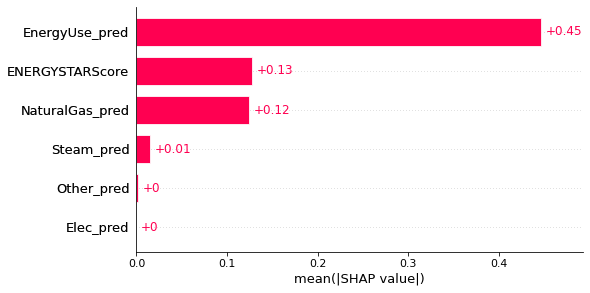

In [73]:
explainer = shap.Explainer(eln_random.best_estimator_, X_train_t)
shap_values = explainer(X_train_t)

shap.plots.bar(shap_values)

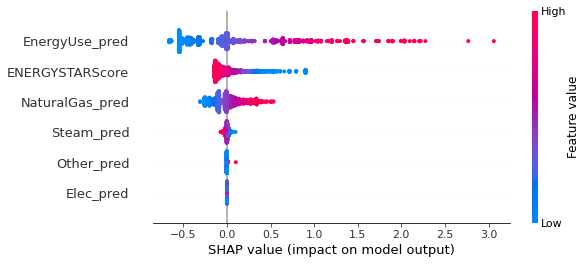

In [74]:
shap.summary_plot(shap_values, feature_names=features_name)

In [75]:
eln_df = pd.DataFrame(data = predictions)
eln_df['True_values'] = y_test
eln_df.columns = ['predictions', 'True_values']
eln_df['Residus'] = eln_df['predictions'] - eln_df['True_values']

In [76]:
eln_df = eln_df.sort_values('predictions')
eln_df = eln_df.reset_index(drop=True)

No handles with labels found to put in legend.


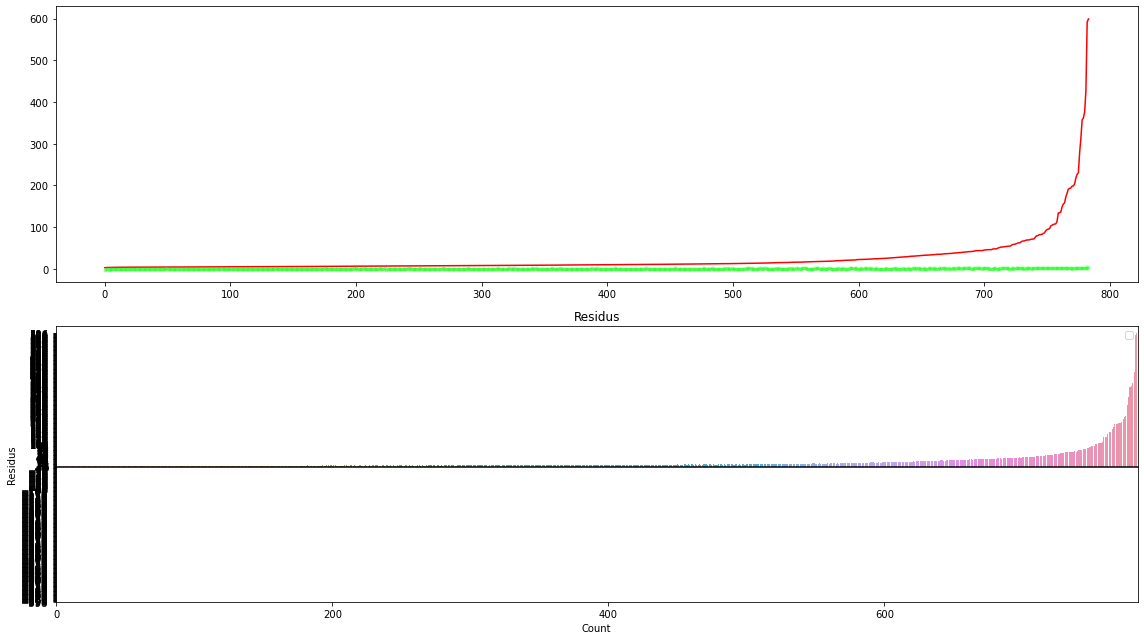

In [77]:
figs, axs = plt.subplots(2,1,figsize=(16,9))
axs[0].plot(eln_df.index.to_list(), eln_df['predictions'].values, c='red', label='Prediction')
axs[0].plot(eln_df.index.to_list(), eln_df['True_values'].values, linestyle = 'none', marker= '.', c='lime',alpha=0.3, label='True_value')


sns.barplot(x=eln_df.index.to_list(), y=eln_df['Residus'], ax=axs[1])
axs[1].axhline(0, color="k", clip_on=False)
axs[1].set(xlabel='Count', ylabel='Residus')
axs[1].set_title("Residus")
axs[1].set_xticks(np.arange(min(eln_df.index.to_list()), max(eln_df.index.to_list())+1, 200))
axs[1].set_yticks(np.arange(round(-max(eln_df['Residus']),0)-1, round(max(eln_df['Residus']),0)+1, 2))

plt.legend()
plt.tight_layout()

## XGBOOST REGRESSOR

In [78]:
xgb1 = XGBRegressor(booster = 'gbtree')
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [0.01,.02,.03, 0.05, .07], #so called `eta` value
              'max_depth': [2,3,4,5],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [400]}

xgb_grid = RandomizedSearchCV(xgb1,
                        parameters,
                        cv = 5,
                        verbose=2,
                        n_iter = 200,
                        n_jobs = -1)

In [79]:
start = timer()
xgb_grid.fit(X_train, y_train)
end = timer()

print ("The time of execution of above program is : ", dt.timedelta(seconds=end-start))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
The time of execution of above program is :  0:00:17.605851


In [80]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.6047060248173938
{'subsample': 0.7, 'objective': 'reg:squarederror', 'nthread': 4, 'n_estimators': 400, 'min_child_weight': 4, 'max_depth': 4, 'learning_rate': 0.02, 'colsample_bytree': 0.7}


In [81]:
best_random = xgb_grid.best_estimator_
random_accuracy_test = xgb_grid.score(X_test, y_test)
random_accuracy_train = xgb_grid.score(X_train, y_train)

In [82]:
print("Score train : " + str(random_accuracy_train))
print("Score test : " + str(random_accuracy_test))

Score train : 0.7328829286575331
Score test : 0.5855975078396105


In [83]:
# Make predictions and determine the error

predictions = (np.exp(scaler_y.inverse_transform(xgb_grid.predict(X_train)))-1)
errors = abs((np.exp(scaler_y.inverse_transform(y_train))-1) - predictions)
# Display the performance metrics
print("-- Train score --")
print('Mean Absolute Deviation:', round(np.mean(errors), 2))
mape = np.mean(abs(((np.exp(scaler_y.inverse_transform(y_train))-1) - predictions) / (np.exp(scaler_y.inverse_transform(y_train))-1)))
print('MAPE:', round(mape, 2), '%.')
mse = mean_squared_error((np.exp(scaler_y.inverse_transform(y_train))-1), predictions, squared = True)
print('MSE : ', round(mse, 2))
rmse = mean_squared_error((np.exp(scaler_y.inverse_transform(y_train))-1), predictions, squared = False)
print('RMSE : ', round(rmse, 2))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

# Make predictions and determine the error
predictions = (np.exp(scaler_y.inverse_transform(xgb_grid.predict(X_test)))-1)
errors = abs((np.exp(scaler_y.inverse_transform(y_test))-1) - predictions)
# Display the performance metrics
print("-- Test score --")
print('Mean Absolute Deviation:', round(np.mean(errors), 2))
mape = np.mean(abs(((np.exp(scaler_y.inverse_transform(y_test))-1) - predictions) / (np.exp(scaler_y.inverse_transform(y_test))-1)))
print('MAPE:', round(mape, 2), '%.')
mse = mean_squared_error((np.exp(scaler_y.inverse_transform(y_test))-1), predictions, squared = True)
print('MSE : ', round(mse, 2))
rmse = mean_squared_error((np.exp(scaler_y.inverse_transform(y_test))-1), predictions, squared = False)
print('RMSE : ', round(rmse, 2))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

-- Train score --
Mean Absolute Deviation: 152.69
MAPE: 6.16 %.
MSE :  78567.7
RMSE :  280.3
Accuracy: 93.84 %.
-- Test score --
Mean Absolute Deviation: 122.37
MAPE: 4.47 %.
MSE :  292746.9
RMSE :  541.06
Accuracy: 95.53 %.


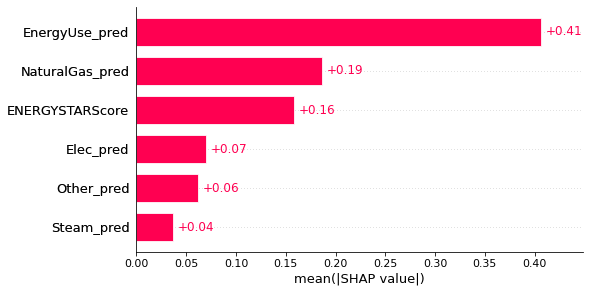

In [84]:
explainer = shap.TreeExplainer(xgb_grid.best_estimator_, X_train_t)
shap_values = explainer(X_train_t)

shap.plots.bar(shap_values)

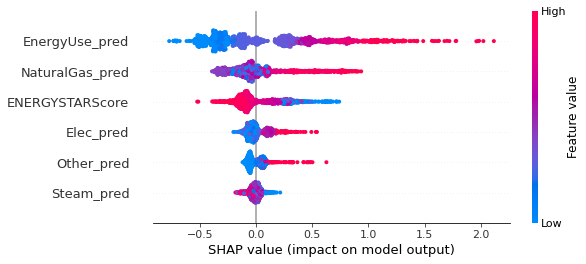

In [85]:
shap.summary_plot(shap_values, feature_names=features_name)

In [86]:
# Get numerical feature importances
importances = list(best_random.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(features_name, round(importance, 2)) for features_name, importance in zip(features_name, importances)]
# Sort the feature importances by most important firstperf_model['XGBoost Regressor'] = mape
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: EnergyUse_pred       Importance: 0.5099999904632568
Variable: Elec_pred            Importance: 0.14000000059604645
Variable: NaturalGas_pred      Importance: 0.10999999940395355
Variable: Other_pred           Importance: 0.10000000149011612
Variable: ENERGYSTARScore      Importance: 0.09000000357627869
Variable: Steam_pred           Importance: 0.05000000074505806


In [87]:
xgb_df = pd.DataFrame(data = (scaler_y.inverse_transform(xgb_grid.predict(X_test))))
xgb_df['True_values'] = (scaler_y.inverse_transform(y_test))
xgb_df.columns = ['predictions', 'True_values']
xgb_df['Residus'] = xgb_df['predictions'] - xgb_df['True_values']

In [88]:
xgb_df = xgb_df.sort_values('predictions')
xgb_df = xgb_df.reset_index(drop=True)

No handles with labels found to put in legend.


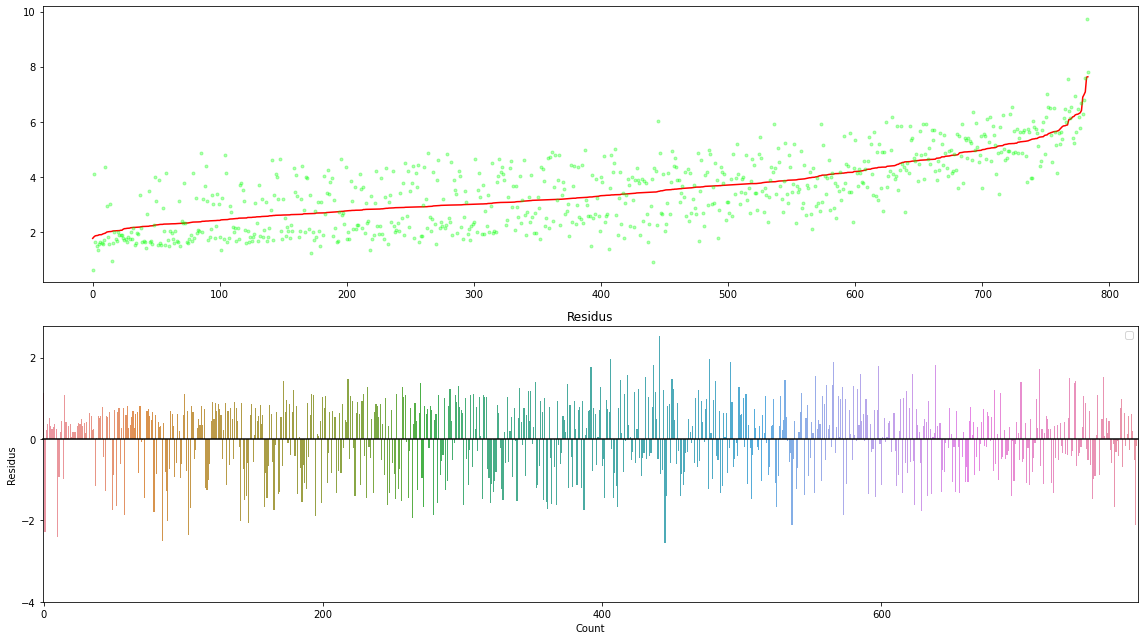

In [89]:
figs, axs = plt.subplots(2,1,figsize=(16,9))
axs[0].plot(xgb_df.index.to_list(), xgb_df['predictions'].values, c='red', label='Prediction')
axs[0].plot(xgb_df.index.to_list(), xgb_df['True_values'].values, linestyle = 'none', marker= '.', c='lime',alpha=0.3, label='True_value')


sns.barplot(x=xgb_df.index.to_list(), y=xgb_df['Residus'], ax=axs[1])
axs[1].axhline(0, color="k", clip_on=False)
axs[1].set(xlabel='Count', ylabel='Residus')
axs[1].set_title("Residus")
axs[1].set_xticks(np.arange(min(xgb_df.index.to_list()), max(xgb_df.index.to_list())+1, 200))
axs[1].set_yticks(np.arange(round(-max(xgb_df['Residus']),0)-1, round(max(xgb_df['Residus']),0)+1, 2))

plt.legend()
plt.tight_layout()